In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 文字化けを防ぐ
import japanize_matplotlib

In [2]:
file_path = '../dataset/house_price_jp.csv'

In [3]:
df = pd.read_csv(file_path, sep=',')

In [4]:
df['Log10_price'] = df['price'].apply(lambda x: np.log10(x))

In [5]:
df['station_dis'] = pd.to_numeric(df['station_dis'], errors='coerce')
df['area'] = pd.to_numeric(df['area'], errors='coerce')
df = df.dropna(subset=['station_dis', 'area'])

<Axes: xlabel='building_year', ylabel='Log10_price'>

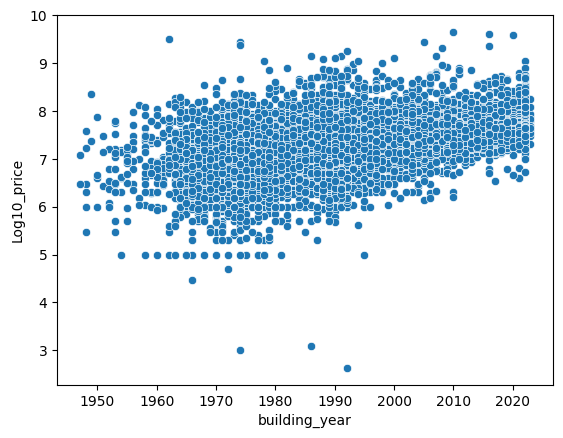

In [6]:
sns.scatterplot(data=df, x='building_year', y='Log10_price')

In [7]:
df['room'].unique()

array(['３ＬＤＫ', '２ＬＤＫ', '１Ｒ', '１ＤＫ', nan, '１ＬＤＫ', '２ＤＫ', '４ＬＤＫ', '１Ｋ',
       '３ＬＤＫ＋Ｓ', '２ＬＤＫ＋Ｓ', '５ＬＤＫ', '１ＬＤＫ＋Ｓ', '３ＤＫ', '４ＤＫ', 'オープンフロア',
       '２Ｋ', '２ＤＫ＋Ｓ', '１ＤＫ＋Ｓ', '３Ｋ', '４ＬＤＫ＋Ｓ', '４Ｋ', '５ＤＫ'], dtype=object)

<Axes: xlabel='building_year', ylabel='Log10_price'>

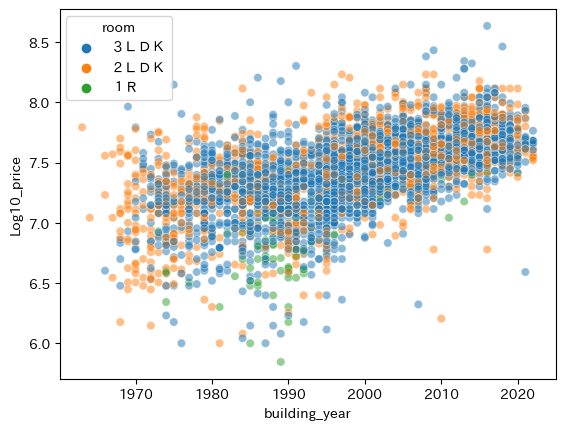

In [12]:
target_room = ["３ＬＤＫ", "２ＬＤＫ", "１Ｒ"]
target_df = df.query('room in @target_room')
sns.scatterplot(data=target_df, x='building_year', y='Log10_price', hue='room', alpha=0.5)

# matplotlibで書くと下記のようになっていた(seabornの方がより簡単に書ける)
# target_df = df.query('room == "３ＬＤＫ"')
# plt.scatter(target_df['building_year'], target_df['Log10_price'], label='3LDK', alpha=0.3)

# target_df = df.query('room == "２ＬＤＫ"')
# plt.scatter(target_df['building_year'], target_df['Log10_price'], label='2LDK', alpha=0.3)

# target_df = df.query('room == "１Ｒ"')
# plt.scatter(target_df['building_year'], target_df['Log10_price'], label='1R', alpha=0.3)
# plt.xlabel('building_year')
# plt.ylabel('Log10 Price')
# # ラベルの表示
# plt.legend()

### jointplot

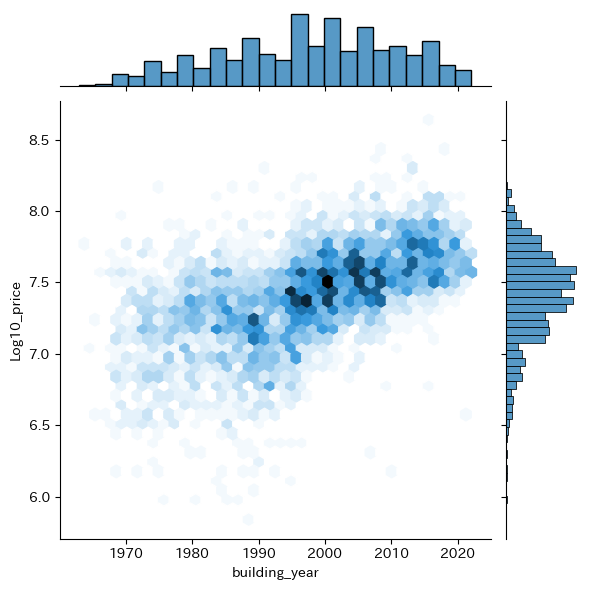

In [13]:
# 外側はヒストグラムを表し、色の濃い部分はデータが密集している
sns.jointplot(data=target_df, x='building_year', y='Log10_price', kind='hex')

### pairplot

In [14]:
# pairplotは重い処理なので、今回は変数を絞る
target_df.select_dtypes(['float64', 'int64']).columns

Index(['index', 'building_year', 'station_dis', 'price', 'price_per_tsubo',
       'area', 'frontage', 'BCR', 'FAR', 'Log10_price'],
      dtype='object')

In [16]:
col_names = ['building_year', 'station_dis', 'area', 'frontage', 'BCR', 'FAR', 'Log10_price'] + ['room']

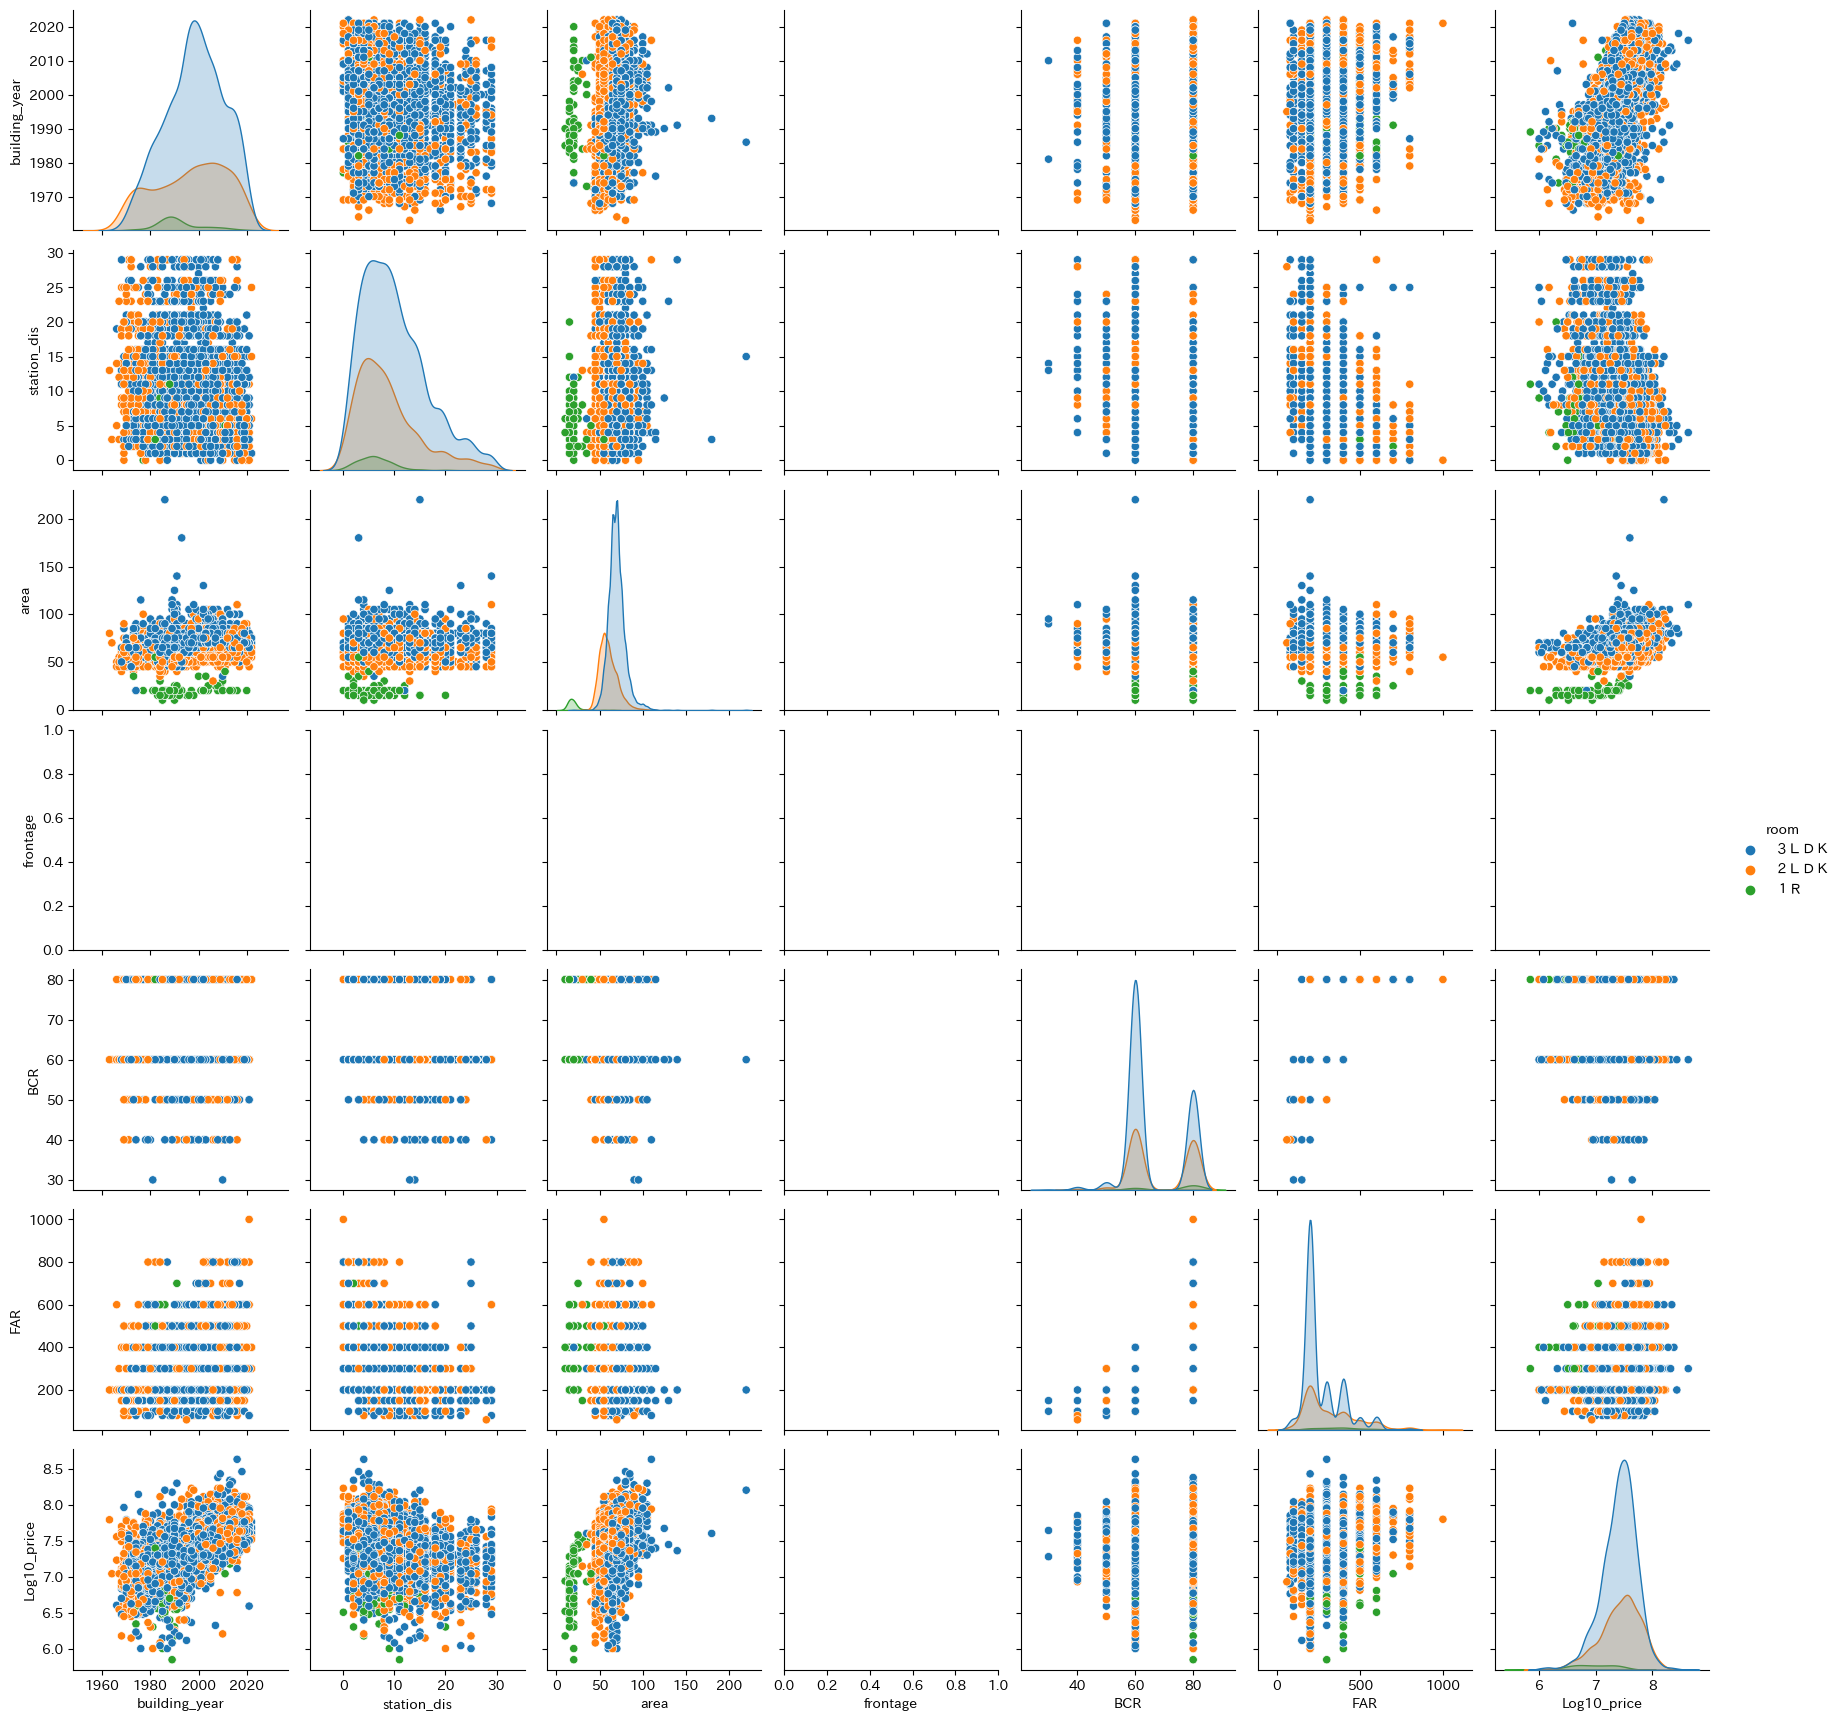

In [17]:
sns.pairplot(data=target_df[col_names], hue='room')

### histplot / boxplot / violinplot

<Axes: xlabel='Log10_price', ylabel='Density'>

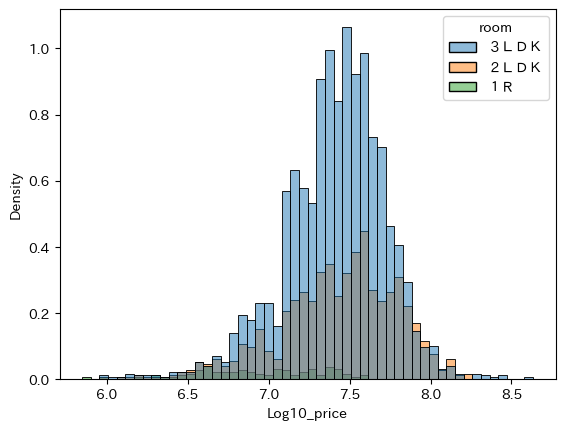

In [18]:
# stat='density'で面積が1になるように規格化される
sns.histplot(data=target_df, x='Log10_price', hue='room', stat='density')

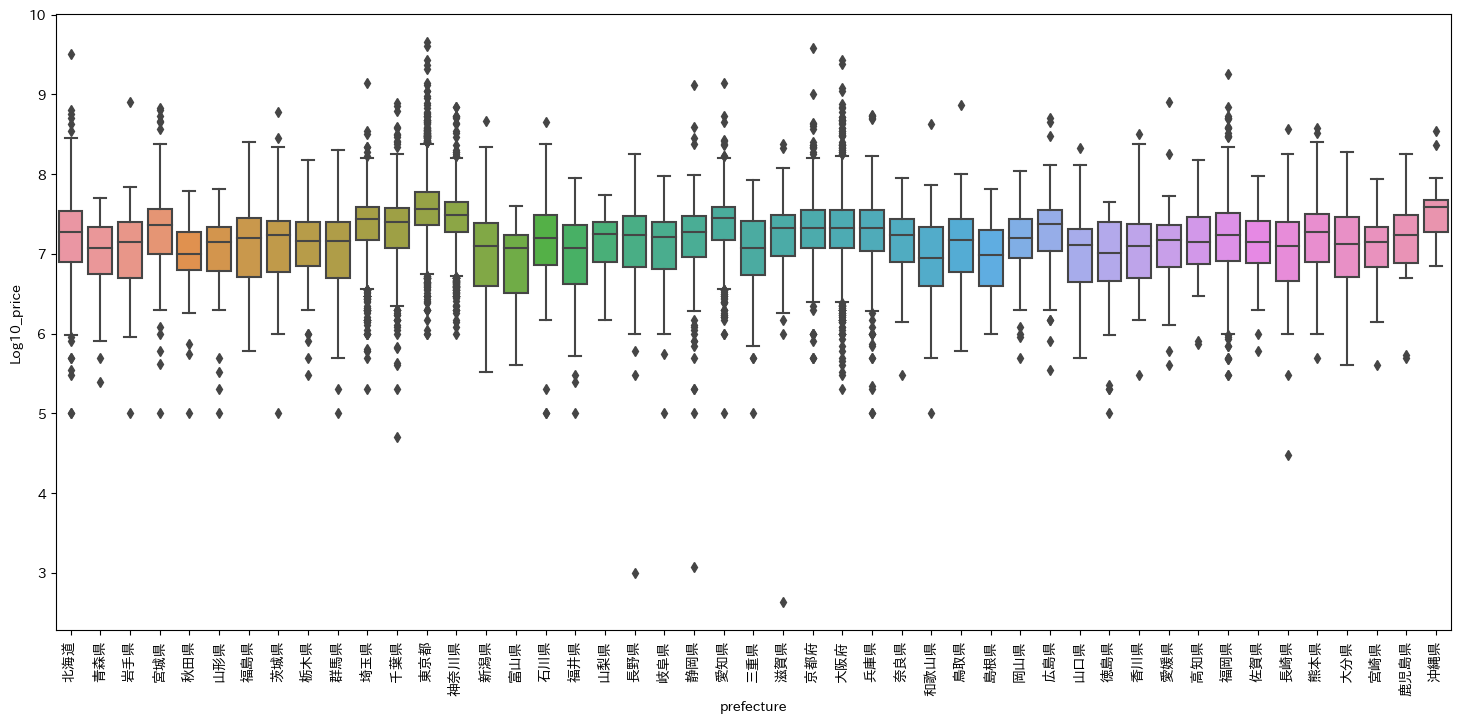

In [25]:
# 箱ひげ図(真ん中にある黒い棒線が中央値、その下の線が25%タイル、その上の線が75%タイルを表す)
fig = plt.figure(figsize=(18, 8))
fig = sns.boxplot(data=df, x='prefecture', y='Log10_price')
fig = plt.xticks(rotation=90)

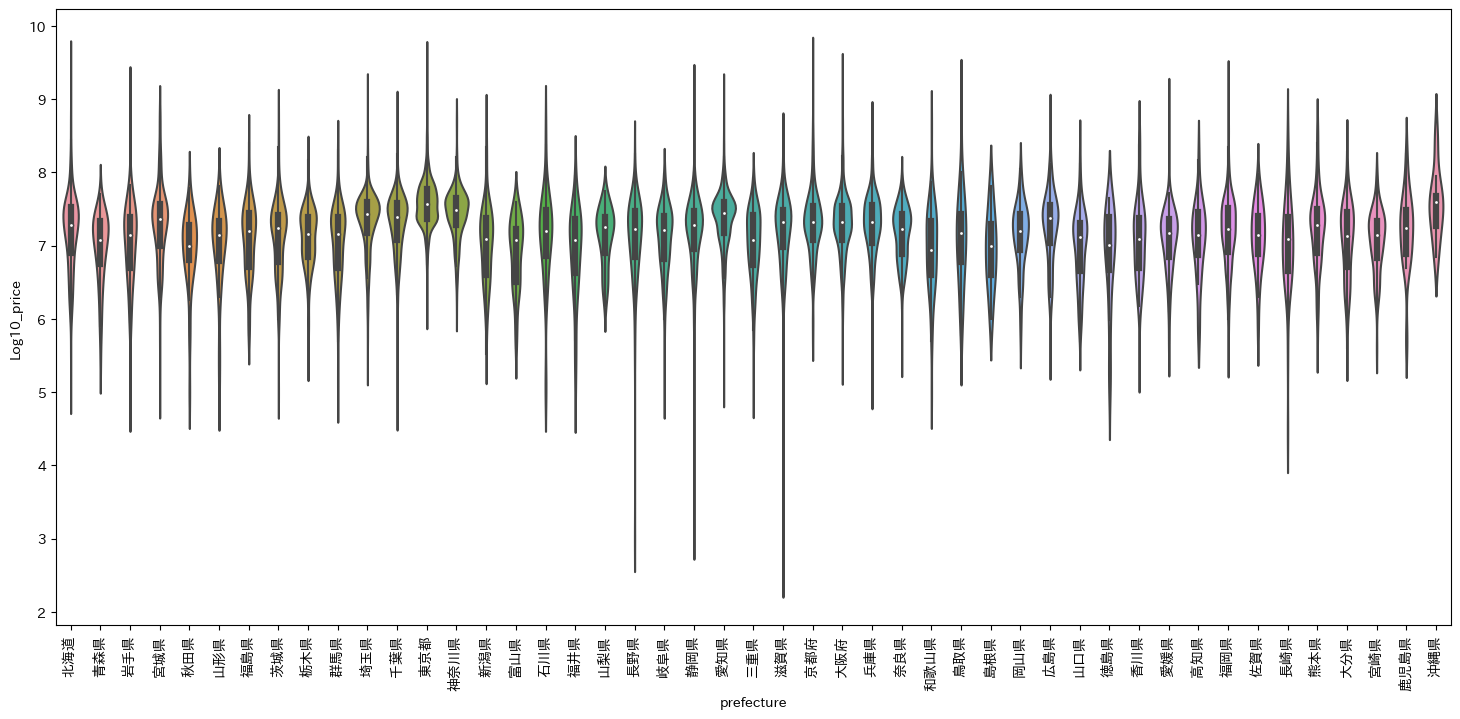

In [26]:
# バイオリンプロット(箱ひげ図に比べてデータが密集している箇所が分かる)
fig = plt.figure(figsize=(18, 8))
fig = sns.violinplot(data=df, x='prefecture', y='Log10_price')
fig = plt.xticks(rotation=90)

### ヒートマップ

In [27]:
df

,index,type,land_type,prefecture,city,city2,station_name,building_year,station_dis,price,...,room,area,land_shape,frontage,gross_floor_area,building_type,city_plan,BCR,FAR,Log10_price
0,1,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１１丁目,2016,1.0,37000000,...,３ＬＤＫ,75.0,NaN,NaN,NaN,ＲＣ,商業地域,80.0,600.0,7.568202
1,2,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１１丁目,2012,3.0,57000000,...,２ＬＤＫ,75.0,NaN,NaN,NaN,ＲＣ,商業地域,80.0,600.0,7.755875
2,3,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１８丁目,1981,3.0,17000000,...,２ＬＤＫ,50.0,NaN,NaN,NaN,ＲＣ,商業地域,80.0,400.0,7.230449
3,4,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１８丁目,1977,0.0,3200000,...,１Ｒ,20.0,NaN,NaN,NaN,ＳＲＣ,商業地域,80.0,400.0,6.505150
4,5,中古マンション等,NaN,北海道,札幌市中央区,大通西,西１８丁目,1989,2.0,17000000,...,２ＬＤＫ,50.0,NaN,NaN,NaN,ＳＲＣ,商業地域,80.0,400.0,7.230449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19851,36272,中古マンション等,NaN,沖縄県,那覇市,牧志,美栄橋,2002,6.0,38000000,...,３ＬＤＫ,75.0,NaN,NaN,NaN,ＲＣ,商業地域,80.0,400.0,7.579784
19852,36274,宅地(土地と建物),住宅地,沖縄県,那覇市,字松川,市立病院前(沖縄),2022,9.0,44000000,...,NaN,120.0,ほぼ長方形,9.0,95,木造,第１種低層住居専用地域,50.0,100.0,7.643453
19853,36275,中古マンション等,NaN,沖縄県,那覇市,銘苅,古島,2019,3.0,58000000,...,３ＬＤＫ,80.0,NaN,NaN,NaN,ＲＣ,第２種住居地域,60.0,200.0,7.763428
19854,36276,中古マンション等,NaN,沖縄県,那覇市,寄宮,安里,1990,15.0,15000000,...,２ＤＫ,50.0,NaN,NaN,NaN,ＲＣ,第１種中高層住居専用地域,60.0,200.0,7.176091


In [28]:
# pivottableの作成
df['building_type'].unique()

array(['ＲＣ', 'ＳＲＣ', '鉄骨造', '木造', nan, '軽量鉄骨造', 'ＲＣ、木造', 'ブロック造',
       '木造、ブロック造', '鉄骨造、軽量鉄骨造', 'ＳＲＣ、ＲＣ', '鉄骨造、木造', 'ＲＣ、木造、軽量鉄骨造',
       '木造、軽量鉄骨造', 'ＳＲＣ、鉄骨造', 'ＲＣ、鉄骨造', 'ＲＣ、鉄骨造、木造'], dtype=object)

In [31]:
target_building_type = ['ＲＣ', 'ＳＲＣ', '鉄骨造', '木造']
query = 'building_type in @target_building_type'
my_pivot = pd.pivot_table(df.query(query), index='building_type', columns='city_plan',
                          values='index', aggfunc='count')

In [32]:
my_pivot

city_plan,商業地域,工業地域,工業専用地域,市街化区域及び市街化調整区域外の都市計画区域,市街化調整区域,準住居地域,準工業地域,準都市計画区域,第１種中高層住居専用地域,第１種低層住居専用地域,第１種住居地域,第２種中高層住居専用地域,第２種低層住居専用地域,第２種住居地域,近隣商業地域,都市計画区域外
building_type,,,,,,,,,,,,,,,,
木造,138.0,68.0,1.0,269.0,286.0,56.0,366.0,6.0,1046.0,1677.0,1542.0,431.0,54.0,216.0,219.0,82.0
鉄骨造,127.0,36.0,8.0,24.0,24.0,13.0,83.0,1.0,67.0,20.0,128.0,38.0,3.0,45.0,100.0,10.0
ＲＣ,1442.0,147.0,NaN,5.0,16.0,123.0,665.0,NaN,746.0,220.0,853.0,240.0,17.0,287.0,635.0,3.0
ＳＲＣ,1035.0,26.0,NaN,NaN,11.0,20.0,216.0,NaN,158.0,5.0,211.0,50.0,NaN,57.0,192.0,NaN


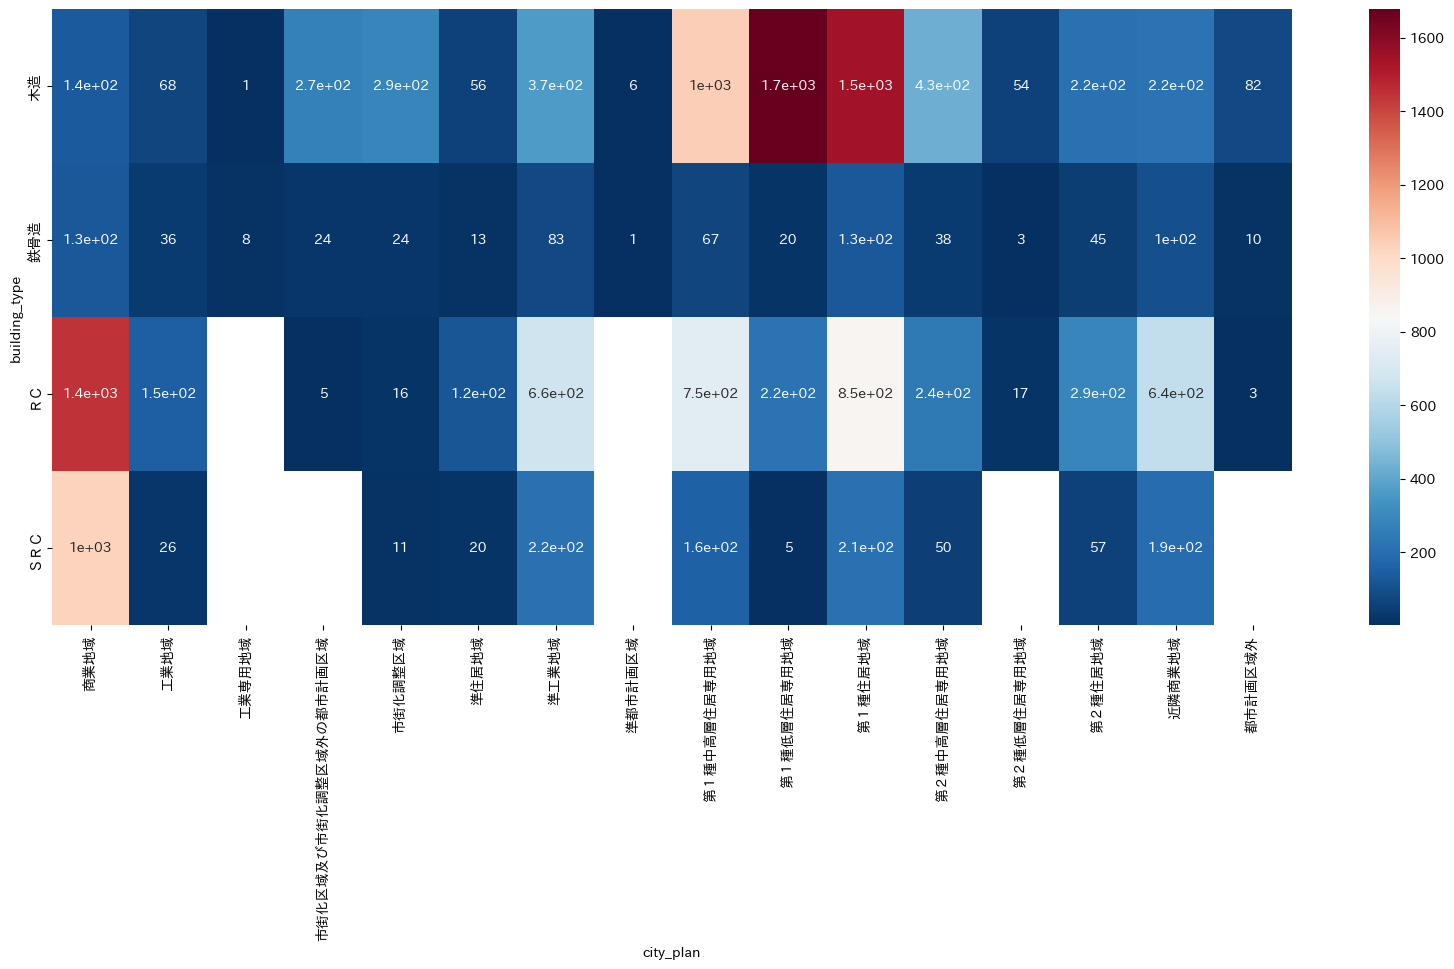

In [34]:
fig = plt.figure(figsize=(20, 8))
# annot=Trueで数値を表示
# heatmapはクロス集計結果を分かりやすく表示できる
fig = sns.heatmap(my_pivot, annot=True, cmap='RdBu_r')

### facetGrid(matplotlibのsubplot)

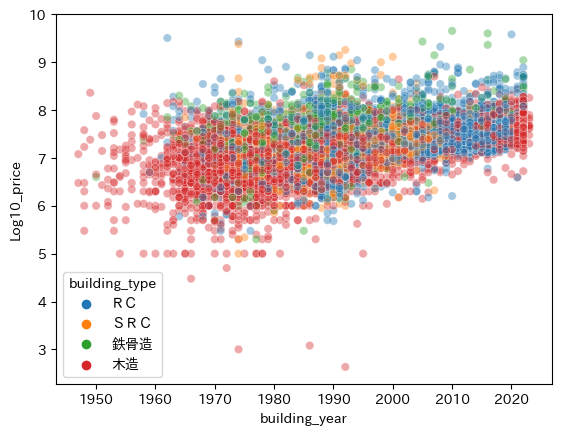

In [35]:
# 点が多すぎてtypeにどのような違いがあるのか判断するのが難しい
query = 'building_type in ["ＲＣ", "ＳＲＣ", "鉄骨造", "木造"]'
fig = sns.scatterplot(data=df.query(query), x='building_year', y='Log10_price',
                      hue='building_type', alpha=0.4)

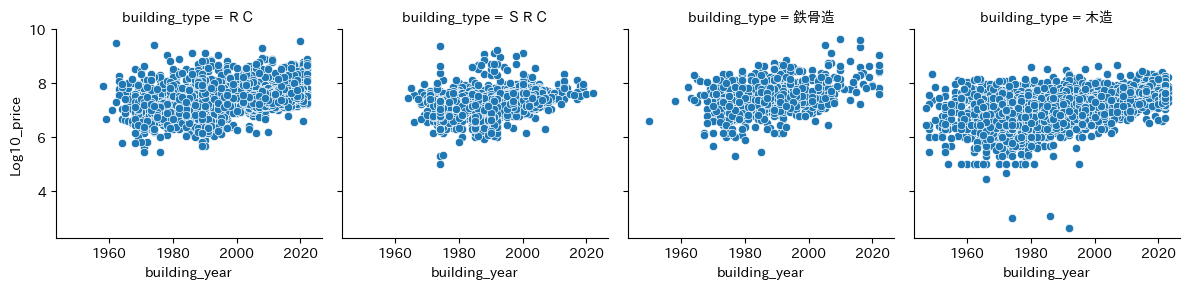

In [36]:
# building_typeごとに分けてプロットする
g = sns.FacetGrid(df.query(query), col='building_type')
g.map(sns.scatterplot, 'building_year', 'Log10_price')